<a href="https://colab.research.google.com/github/oldistic/fishify/blob/machine-learning/fishify_model_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
import matplotlib.pyplot as plt

In [2]:


# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Definisikan path dataset
train_data_dir = '/content/drive/MyDrive/capstone_project/fishify/datasets/Roboflow Dataset/train'
valid_data_dir = '/content/drive/MyDrive/capstone_project/fishify/datasets/Roboflow Dataset/valid'

In [5]:
# Tentukan parameter-model
batch_size = 32
image_size = (224, 224)
epochs = 10

# Augmentasi data untuk train set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Normalisasi data untuk validation set
valid_datagen = ImageDataGenerator(rescale=1./255)

# Persiapkan data train
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Persiapkan data validation
valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Bangun arsitektur model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(13, activation='softmax')  # Jumlah kelas ikan
])

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



Found 546 images belonging to 13 classes.
Found 52 images belonging to 13 classes.


In [6]:
# Latih model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size
)



Epoch 1/10
17/17 [==============================] - 230s 13s/step - loss: 2.6218 - accuracy: 0.1615 - val_loss: 2.3137 - val_accuracy: 0.1562
Epoch 2/10
17/17 [==============================] - 69s 4s/step - loss: 2.0735 - accuracy: 0.2763 - val_loss: 1.6928 - val_accuracy: 0.4062
Epoch 3/10
17/17 [==============================] - 69s 4s/step - loss: 1.7573 - accuracy: 0.3794 - val_loss: 1.4965 - val_accuracy: 0.4375
Epoch 4/10
17/17 [==============================] - 70s 4s/step - loss: 1.5703 - accuracy: 0.4747 - val_loss: 1.5415 - val_accuracy: 0.5312
Epoch 5/10
17/17 [==============================] - 69s 4s/step - loss: 1.6917 - accuracy: 0.4339 - val_loss: 1.3545 - val_accuracy: 0.4688
Epoch 6/10
17/17 [==============================] - 69s 4s/step - loss: 1.3707 - accuracy: 0.5233 - val_loss: 1.3044 - val_accuracy: 0.6250
Epoch 7/10
17/17 [==============================] - 71s 4s/step - loss: 1.1801 - accuracy: 0.6051 - val_loss: 1.3782 - val_accuracy: 0.5312
Epoch 8/10
17/17 [

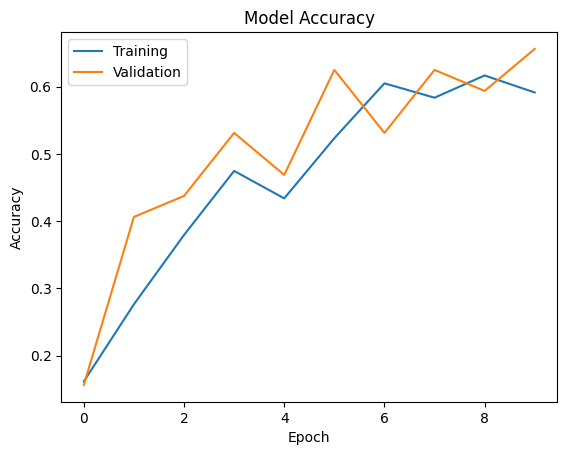

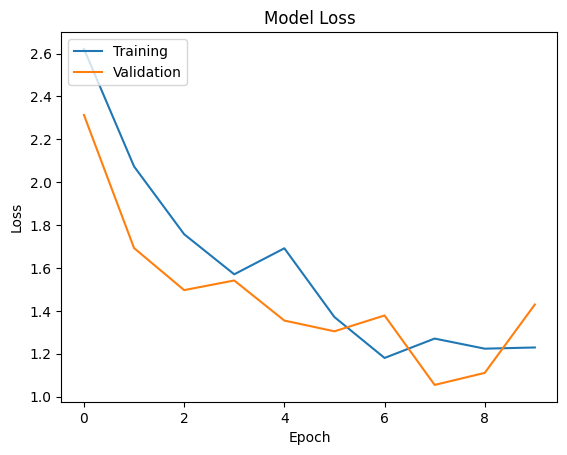

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

# Plot grafik loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Simpan model
model.save('fish_detection_model.h5')